<a href="https://colab.research.google.com/github/techonair/Machine-Learing-A-Z/blob/main/Regression/Support%20Vector%20Regression/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Regression**

## Importing Libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset

In [38]:
from google.colab import files
files.upload()

Saving Position_Salaries.csv to Position_Salaries (2).csv


{'Position_Salaries.csv': b'Position,Level,Salary\r\nBusiness Analyst,1,45000\r\nJunior Consultant,2,50000\r\nSenior Consultant,3,60000\r\nManager,4,80000\r\nCountry Manager,5,110000\r\nRegion Manager,6,150000\r\nPartner,7,200000\r\nSenior Partner,8,300000\r\nC-level,9,500000\r\nCEO,10,1000000'}

## Spliting Dataset Into X and Y

I am not splitting up the X and the Y sets into train and test set because I want to leverage the whole dataset into my model.

In [65]:
dataset =  pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

In [66]:
print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [67]:
Y = Y.reshape(len(Y), 1) #transforming to 2D array

In [68]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

I am doing feature scaling here because in SVR we don't have an implicit relation between the y and the x variable, so as we don't have the coefficients to compensate the higher values in independent variables, therefore I need to apply feature scaling.

**Important thing to note:** I will apply FS to X and Y seprately because FS computes mean and standard deviation of the variables and here in our dataset the positions and salaries clearly don't have the same mean and all so I need to seprately apply FS to X and Y.

In [69]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
Y = scaler_y.fit_transform(Y)

In [70]:
# FS scales values in the range of -3 to 3
print(X)
print(Y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training The SVR Model With Whole Dataset

I am using RBF Kernal as that is the most popular and good to deal with space and resembles features of KNN.

In [71]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting A New Result

In [72]:
scaler_y.inverse_transform(regressor.predict(scaler_x.transform([[6.5]])))


array([170370.0204065])

## Visualizing the SVR Result

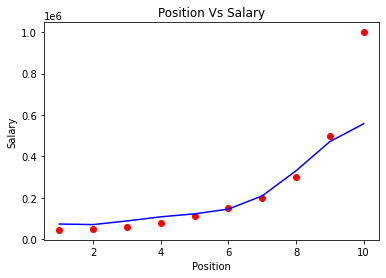

In [75]:
plt.scatter(scaler_x.inverse_transform(X), scaler_y.inverse_transform(Y), color= 'red')
plt.plot(scaler_x.inverse_transform(X), scaler_y.inverse_transform(regressor.predict(X)), color='blue')
plt.title('Position Vs Salary')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()